In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.compose
import sklearn.preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
df= pd.read_csv(r'C:\Users\icath\OneDrive\Documents\Salty Coder\titanic.csv')

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Survived', ylabel='count'>

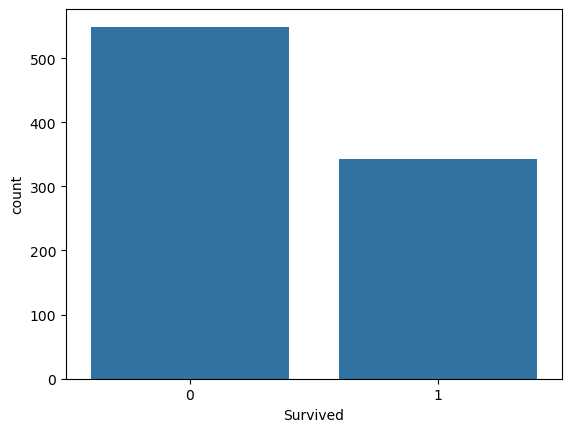

In [3]:
# Analysing Data
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Survived', ylabel='count'>

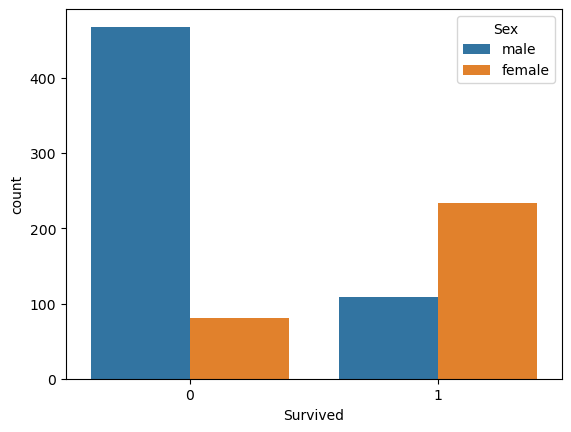

In [4]:
sns.countplot(x="Survived",hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

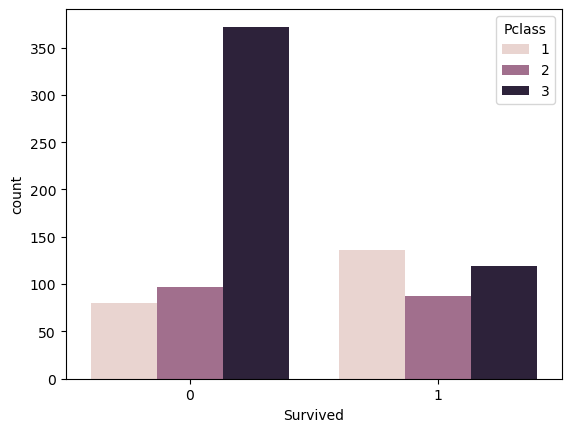

In [5]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<Axes: ylabel='Frequency'>

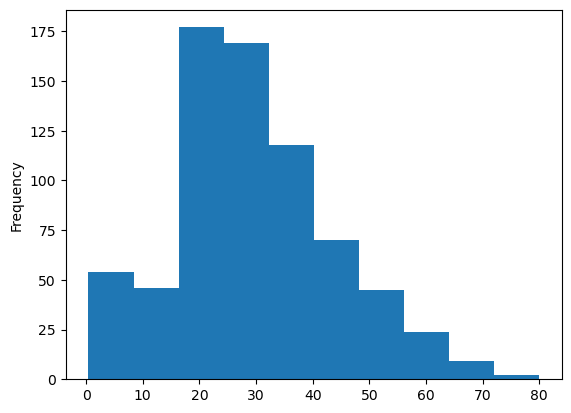

In [6]:
df["Age"].plot.hist()

<Axes: ylabel='Frequency'>

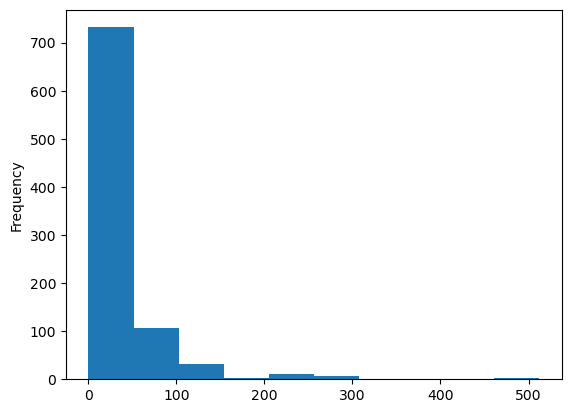

In [7]:
df["Fare"].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

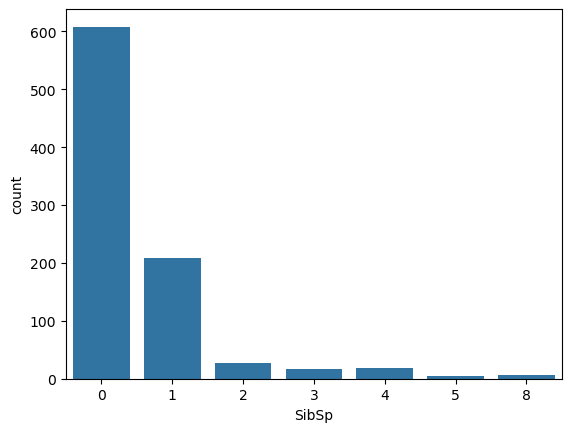

In [8]:
sns.countplot(x="SibSp",data=df)

<Axes: xlabel='Parch', ylabel='count'>

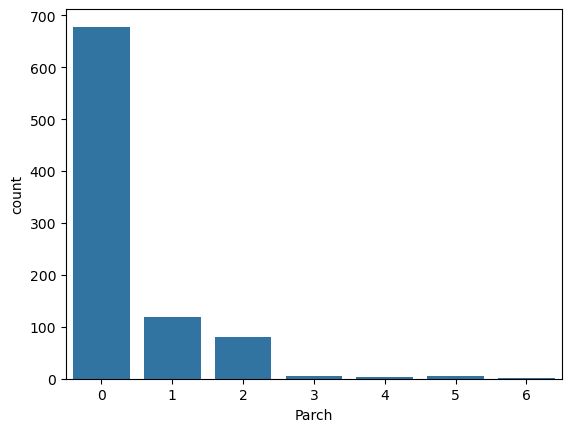

In [9]:
sns.countplot(x="Parch",data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

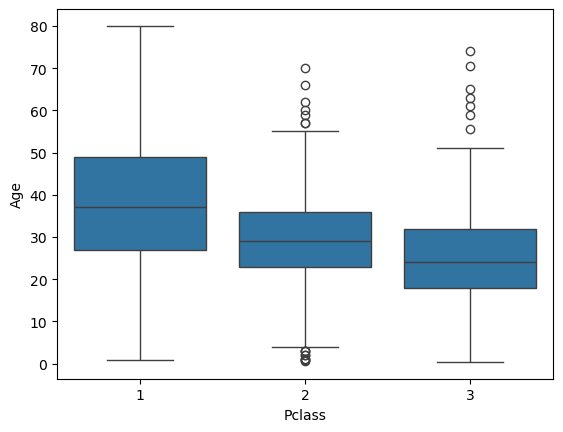

In [10]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [11]:
# display(X_train[(X_train.Age.isnull())&(X_train.Name.str.contains('Master'))])

In [12]:
display(df[(df.Age.isnull())&(df.Name.str.contains('Master'))])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C


In [13]:
print(df[df.Name.str.contains('Master')]['Age'].mean())

4.574166666666667


In [14]:
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# df.groupby(['Title', 'Pclass','Sex'])['Age'].agg(['mean', 'count'])

## SPLIT DATA

In [17]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = df.drop(columns = ['Survived']).copy()
y = df['Survived']
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(712, 11)
(712,)
(89, 11)
(89,)
(90, 11)
(90,)


(None, None)

In [18]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
539,540,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
555,556,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
101,102,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
405,406,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S
87,88,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
523,524,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
785,786,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S


In [19]:
X_train['Title'] = X_train['Name'].str.split(r'\s*,\s*|\s*\.\s*').str[1]
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
539,540,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C,Miss
555,556,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,Mr
101,102,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr
405,406,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S,Mr
87,88,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
523,524,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,Mrs
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,Mrs
785,786,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S,Mr


In [20]:
X_train["Title"].value_counts()

Title
Mr              414
Miss            152
Mrs              92
Master           31
Dr                6
Rev               5
Major             2
Mlle              2
Jonkheer          1
Sir               1
Mme               1
Lady              1
Col               1
Ms                1
the Countess      1
Capt              1
Name: count, dtype: int64

In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Dr": 5, "Rev": 5, "Col": 5, "Major": 5, "Mlle": 5,"the Countess": 5,
                 "Ms": 5, "Lady": 5, "Jonkheer": 5, "Don": 5, "Dona" : 5, "Mme": 5,"Capt": 5,"Sir": 5 }
default_title_mapping = 0  # Assign a default value for titles not present in the mapping

X_train['Title_Prefix'] = X_train["Title"].map(title_mapping).fillna(default_title_mapping)

In [22]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Prefix
539,540,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C,Miss,2
555,556,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,Mr,1
101,102,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr,1
405,406,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S,Mr,1
87,88,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,524,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,Mrs,3
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,2
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,Mrs,3
785,786,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S,Mr,1


In [23]:
X_train['Family_cnt'] = X_train['SibSp'] + X_train['Parch']
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Prefix,Family_cnt
539,540,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C,Miss,2,2
555,556,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,Mr,1,0
101,102,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr,1,0
405,406,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S,Mr,1,1
87,88,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S,Mr,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,524,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,Mrs,3,1
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,2,0
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,Mrs,3,4
785,786,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S,Mr,1,0


In [24]:
X_train['Embarked'].fillna('S', inplace=True)

In [25]:
display(X_train[X_train.Title.isnull()])


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Prefix,Family_cnt


In [26]:
X_train.drop(["Title","Cabin","PassengerId","Ticket"],axis=1,inplace=True)

In [27]:
grp = X_train.groupby(['Title_Prefix', 'Pclass','Sex'])['Age'].agg(['mean', 'count'])

In [28]:
def fill_age(x):
    if np.isnan(x['Age']):
        return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title_Prefix==x.Title_Prefix)]['Age'].values[0]
    else:
        return x['Age']
print(grp)

                                 mean  count
Title_Prefix Pclass Sex                     
1            1      male    42.363014     73
             2      male    33.687500     64
             3      male    29.302703    185
2            1      female  30.657895     38
             2      female  22.229167     24
             3      female  16.508475     59
3            1      female  39.478261     23
             2      female  33.896552     29
             3      female  34.962963     27
4            1      male     5.306667      3
             2      male     2.258889      9
             3      male     5.500000     16
5            1      female  33.666667      6
                    male    48.888889      9
             2      female  28.000000      1
                    male    39.857143      7


In [29]:
grp = X_train.groupby(['Pclass','Sex','Title_Prefix'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title_Prefix', 'Age']]

In [30]:
# Apply the fill_age function to the 'Age' column of X_train
X_train['Age'] = X_train.apply(lambda x: fill_age(x), axis=1)

In [31]:
X_train.drop(["Name"],axis=1,inplace=True)

In [32]:
X_train.isnull().sum()

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title_Prefix    0
Family_cnt      0
dtype: int64

In [33]:
one_hot_cols = ["Embarked", "Title_Prefix","Sex"]
for col in one_hot_cols:
    X_train = pd.concat(
        [X_train, pd.get_dummies(X_train[col], prefix=col)], 
        axis=1, 
        join="inner",
    )
X_train = X_train.drop(one_hot_cols, axis=1)

In [34]:
scaler = StandardScaler()
X_train.loc[:] = scaler.fit_transform(X_train)

In [35]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_cnt,Embarked_C,Embarked_Q,Embarked_S,Title_Prefix_1,Title_Prefix_2,Title_Prefix_3,Title_Prefix_4,Title_Prefix_5,Sex_female,Sex_male
539,-1.571540,-0.569221,-0.471063,1.876736,0.326583,0.664242,2.115874,-0.300586,-1.663489,-1.178669,1.919430,-0.385210,-0.213357,-0.182707,1.355232,-1.355232
555,-1.571540,2.359481,-0.471063,-0.477865,-0.116146,-0.565772,-0.472618,-0.300586,0.601146,0.848414,-0.520988,-0.385210,-0.213357,-0.182707,-0.737881,0.737881
101,0.821907,-0.034535,-0.471063,-0.477865,-0.476005,-0.565772,-0.472618,-0.300586,0.601146,0.848414,-0.520988,-0.385210,-0.213357,-0.182707,-0.737881,0.737881
405,-0.374816,0.309390,0.445322,-0.477865,-0.223211,0.049235,-0.472618,-0.300586,0.601146,0.848414,-0.520988,-0.385210,-0.213357,-0.182707,-0.737881,0.737881
87,0.821907,-0.034535,-0.471063,-0.477865,-0.473030,-0.565772,-0.472618,-0.300586,0.601146,0.848414,-0.520988,-0.385210,-0.213357,-0.182707,-0.737881,0.737881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,-1.571540,1.041565,-0.471063,0.699435,0.490155,0.049235,2.115874,-0.300586,-1.663489,-1.178669,-0.520988,2.595984,-0.213357,-0.182707,1.355232,-1.355232
258,-1.571540,0.382607,-0.471063,-0.477865,9.255029,-0.565772,2.115874,-0.300586,-1.663489,-1.178669,1.919430,-0.385210,-0.213357,-0.182707,1.355232,-1.355232
736,0.821907,1.334435,0.445322,3.054036,0.034806,1.894255,-0.472618,-0.300586,0.601146,-1.178669,-0.520988,2.595984,-0.213357,-0.182707,1.355232,-1.355232
785,0.821907,-0.349568,-0.471063,-0.477865,-0.488463,-0.565772,-0.472618,-0.300586,0.601146,0.848414,-0.520988,-0.385210,-0.213357,-0.182707,-0.737881,0.737881


In [36]:
cross_valid_scores = {}

In [37]:
%%time
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier()

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters {'max_depth': 7}
Mean cross-validated accuracy score of the best_estimator: 0.816
-----
CPU times: total: 93.8 ms
Wall time: 125 ms


In [38]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier()

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'max_depth': 9, 'n_estimators': 20}
Mean cross-validated accuracy score of the best_estimator: 0.836
-----
CPU times: total: 2.7 s
Wall time: 2.93 s


In [39]:
%%time
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_logistic_regression = LogisticRegression(solver='liblinear', penalty='l1')

model_logistic_regression = GridSearchCV(
    model_logistic_regression, 
    parameters, 
    cv=5,
    scoring='accuracy',
)


model_logistic_regression.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_logistic_regression.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_logistic_regression.best_score_:.3f}'
)
cross_valid_scores['logistic_regression'] = model_logistic_regression.best_score_
print('-----')

-----
Best parameters {'C': 0.1, 'penalty': 'l2'}
Mean cross-validated accuracy score of the best_estimator: 0.822
-----
CPU times: total: 172 ms
Wall time: 229 ms


In [40]:
pd.DataFrame(cross_valid_scores, index=['cross_valid_score']).T

,cross_valid_score
desicion_tree,0.816005
random_forest,0.835684
logistic_regression,0.821678


In [41]:
model_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'n_estimators': [5, 10, 15, 20, 25]},
             scoring='accuracy')

## MODEL VALIDATION AND HYPER PARAMETER TUNING

In [42]:
X_rem

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
228,229,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
543,544,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
426,427,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
563,564,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S
391,392,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
163,164,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
304,305,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
671,672,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [43]:
X_rem['Title'] = X_rem['Name'].str.split(r'\s*,\s*|\s*\.\s*').str[1]
X_rem

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
228,229,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S,Mr
543,544,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S,Mr
426,427,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S,Mrs
563,564,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S,Mr
391,392,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,Mrs
163,164,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S,Mr
304,305,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,Mr
671,672,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


In [44]:
X_rem["Title"].value_counts()

Title
Mr        103
Mrs        33
Miss       30
Master      9
Don         1
Rev         1
Dr          1
Col         1
Name: count, dtype: int64

In [45]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Dr": 5, "Rev": 5, "Col": 5, "Major": 5, "Mlle": 5,"the Countess": 5,
                 "Ms": 5, "Lady": 5, "Jonkheer": 5, "Don": 5, "Dona" : 5, "Mme": 5,"Capt": 5,"Sir": 5 }
default_title_mapping = 0  # Assign a default value for titles not present in the mapping

X_rem['Title_Prefix'] = X_rem["Title"].map(title_mapping).fillna(default_title_mapping)

In [46]:
X_rem

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Prefix
228,229,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S,Mr,1
543,544,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S,Mr,1
426,427,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S,Mrs,3
563,564,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S,Mr,1
391,392,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,Mrs,3
163,164,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S,Mr,1
304,305,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,Mr,1
671,672,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,1


In [47]:
X_rem['Family_cnt'] = X_rem['SibSp'] + X_rem['Parch']

In [48]:
X_rem['Embarked'].fillna('S', inplace=True)

In [49]:
display(X_rem[X_rem.Title.isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Prefix,Family_cnt


In [50]:
X_rem.drop(["Title","Cabin","PassengerId","Ticket"],axis=1,inplace=True)

In [51]:
grp = X_rem.groupby(['Title_Prefix', 'Pclass','Sex'])['Age'].agg(['mean', 'count'])

In [52]:
def fill_age(x):
    if np.isnan(x['Age']):
        return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title_Prefix==x.Title_Prefix)]['Age'].values[0]
    else:
        return x['Age']
print(grp)

                                 mean  count
Title_Prefix Pclass Sex                     
1            1      male    37.500000     14
             2      male    29.500000     18
             3      male    26.295455     44
2            1      female  26.428571      7
             2      female  22.875000      8
             3      female  13.850000     10
3            1      female  43.818182     11
             2      female  33.166667     12
             3      female  27.000000      6
4            3      male     5.052500      8
5            1      male    48.000000      2
             2      male    57.000000      1


In [53]:
grp = X_rem.groupby(['Pclass','Sex','Title_Prefix'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title_Prefix', 'Age']]

In [54]:
X_rem['Age'] = X_rem.apply(lambda x: fill_age(x), axis=1)

In [55]:
X_rem.drop(["Name"],axis=1,inplace=True)

In [56]:
X_rem.isnull().sum()

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title_Prefix    0
Family_cnt      0
dtype: int64

In [57]:
one_hot_cols = ["Embarked", "Title_Prefix","Sex"]
for col in one_hot_cols:
    X_rem = pd.concat(
        [X_rem, pd.get_dummies(X_rem[col], prefix=col)], 
        axis=1, 
        join="inner",
    )
X_rem = X_rem.drop(one_hot_cols, axis=1)


In [58]:
scaler = StandardScaler()
X_rem.loc[:] = scaler.fit_transform(X_rem)

In [59]:
X_rem

,Pclass,Age,SibSp,Parch,Fare,Family_cnt,Embarked_C,Embarked_Q,Embarked_S,Title_Prefix_1,Title_Prefix_2,Title_Prefix_3,Title_Prefix_4,Title_Prefix_5,Sex_female,Sex_male
228,-0.347781,-0.768034,-0.488474,-0.482292,-0.445464,-0.541996,-0.519137,-0.334367,0.674748,0.858990,-0.448712,-0.475423,-0.230089,-0.151186,-0.736956,0.736956
543,-0.347781,0.306684,0.385894,-0.482292,-0.119140,0.100502,-0.519137,-0.334367,0.674748,0.858990,-0.448712,-0.475423,-0.230089,-0.151186,-0.736956,0.736956
426,-0.347781,-0.000378,0.385894,-0.482292,-0.119140,0.100502,-0.519137,-0.334367,0.674748,-1.164158,-0.448712,2.103388,-0.230089,-0.151186,1.356934,-1.356934
563,0.849389,-0.131228,-0.488474,-0.482292,-0.569718,-0.541996,-0.519137,-0.334367,0.674748,0.858990,-0.448712,-0.475423,-0.230089,-0.151186,-0.736956,0.736956
391,0.849389,-0.537737,-0.488474,-0.482292,-0.576098,-0.541996,-0.519137,-0.334367,0.674748,0.858990,-0.448712,-0.475423,-0.230089,-0.151186,-0.736956,0.736956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-1.544952,-0.230675,0.385894,2.903211,3.032392,1.385499,-0.519137,-0.334367,0.674748,-1.164158,-0.448712,2.103388,-0.230089,-0.151186,1.356934,-1.356934
163,0.849389,-0.844799,-0.488474,-0.482292,-0.554343,-0.541996,-0.519137,-0.334367,0.674748,0.858990,-0.448712,-0.475423,-0.230089,-0.151186,-0.736956,0.736956
304,0.849389,-0.131228,-0.488474,-0.482292,-0.569718,-0.541996,-0.519137,-0.334367,0.674748,0.858990,-0.448712,-0.475423,-0.230089,-0.151186,-0.736956,0.736956
671,-1.544952,0.229919,0.385894,-0.482292,0.533507,0.100502,-0.519137,-0.334367,0.674748,0.858990,-0.448712,-0.475423,-0.230089,-0.151186,-0.736956,0.736956


In [60]:


# Define hyperparameters to tune for each model
tree_param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

logreg_param_grid = {'C':[0.1],
                    'max_iter':[50]}

# Perform grid search with cross-validation
tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
forest_grid_search = GridSearchCV(RandomForestClassifier(), forest_param_grid, cv = 3, verbose=True, n_jobs=-1)
logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, scoring='accuracy')

# Fit models to the data
tree_grid_search.fit(X_rem, y_rem)
forest_grid_search.fit(X_rem, y_rem)
logreg_grid_search.fit(X_rem, y_rem)

# Get best hyperparameters and best scores
print("Decision Tree Best Parameters:", tree_grid_search.best_params_)
print("Decision Tree Best Score:", tree_grid_search.best_score_)
print("Random Forest Best Parameters:", forest_grid_search.best_params_)
print("Random Forest Best Score:", forest_grid_search.best_score_)
print("Logistic Regression Best Parameters:", logreg_grid_search.best_params_)
print("Logistic Regression Best Score:", logreg_grid_search.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 3 folds for each of 270 candidates, totalling 810 fits
Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
Decision Tree Best Score: 0.8099747474747475
Random Forest Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best Score: 0.8268361581920903
Logistic Regression Best Parameters: {'C': 0.1, 'max_iter': 50}
Logistic Regression Best Score: 0.8098412698412698


In [61]:
# Evaluate the model on the validation set
val_predictions = model_random_forest.predict(X_rem)


In [62]:
val_accuracy = accuracy_score(y_rem, val_predictions)


In [63]:
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7877094972067039


## MODEL TESTING

In [64]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
530,531,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,NaN,S
385,386,2,"Davies, Mr. Charles Henry",male,18.00,0,0,S.O.C. 14879,73.5000,NaN,S
16,17,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
613,614,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
803,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
542,543,3,"Andersson, Miss. Sigrid Elisabeth",female,11.00,4,2,347082,31.2750,NaN,S
396,397,3,"Olsson, Miss. Elina",female,31.00,0,0,350407,7.8542,NaN,S
711,712,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
828,829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


In [65]:
X_test['Title'] = X_test['Name'].str.split(r'\s*,\s*|\s*\.\s*').str[1]
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
530,531,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,NaN,S,Miss
385,386,2,"Davies, Mr. Charles Henry",male,18.00,0,0,S.O.C. 14879,73.5000,NaN,S,Mr
16,17,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Master
613,614,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q,Mr
803,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Master
...,...,...,...,...,...,...,...,...,...,...,...,...
542,543,3,"Andersson, Miss. Sigrid Elisabeth",female,11.00,4,2,347082,31.2750,NaN,S,Miss
396,397,3,"Olsson, Miss. Elina",female,31.00,0,0,350407,7.8542,NaN,S,Miss
711,712,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S,Mr
828,829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,Mr


In [66]:
X_test["Title"].value_counts()

Title
Mr        50
Mrs       19
Miss      14
Master     6
Don        1
Name: count, dtype: int64

In [67]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Dr": 5, "Rev": 5, "Col": 5, "Major": 5, "Mlle": 5,"the Countess": 5,
                 "Ms": 5, "Lady": 5, "Jonkheer": 5, "Don": 5, "Dona" : 5, "Mme": 5,"Capt": 5,"Sir": 5 }
default_title_mapping = 0  # Assign a default value for titles not present in the mapping

X_test['Title_Prefix'] = X_test["Title"].map(title_mapping).fillna(default_title_mapping)

In [68]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Prefix
530,531,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,NaN,S,Miss,2
385,386,2,"Davies, Mr. Charles Henry",male,18.00,0,0,S.O.C. 14879,73.5000,NaN,S,Mr,1
16,17,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,Master,4
613,614,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q,Mr,1
803,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Master,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,543,3,"Andersson, Miss. Sigrid Elisabeth",female,11.00,4,2,347082,31.2750,NaN,S,Miss,2
396,397,3,"Olsson, Miss. Elina",female,31.00,0,0,350407,7.8542,NaN,S,Miss,2
711,712,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S,Mr,1
828,829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,Mr,1


In [69]:
X_test['Family_cnt'] = X_test['SibSp'] + X_test['Parch']


In [70]:
X_test['Embarked'].fillna('S', inplace=True)


In [71]:
display(X_test[X_test.Title.isnull()])


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Prefix,Family_cnt


In [72]:
X_test.drop(["Title","Cabin","PassengerId","Ticket"],axis=1,inplace=True)


In [73]:
grp = X_test.groupby(['Title_Prefix', 'Pclass','Sex'])['Age'].agg(['mean', 'count'])

In [74]:
def fill_age(x):
    if np.isnan(x['Age']):
        return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title_Prefix==x.Title_Prefix)]['Age'].values[0]
    else:
        return x['Age']
print(grp)

                                 mean  count
Title_Prefix Pclass Sex                     
1            1      male    36.000000      3
             2      male    25.285714      7
             3      male    27.340000     25
2            1      female  25.250000      4
             2      female  13.000000      2
             3      female  20.916667      6
3            1      female  40.800000      5
             2      female  35.250000      8
             3      female  27.750000      4
4            3      male     3.736667      6
5            1      male    40.000000      1


In [75]:
grp = X_test.groupby(['Pclass','Sex','Title_Prefix'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title_Prefix', 'Age']]

In [76]:
X_test['Age'] = X_test.apply(lambda x: fill_age(x), axis=1)


In [77]:
X_test.drop(["Name"],axis=1,inplace=True)

In [78]:
X_test.isnull().sum()

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title_Prefix    0
Family_cnt      0
dtype: int64

In [79]:
one_hot_cols = ["Embarked", "Title_Prefix","Sex"]
for col in one_hot_cols:
    X_test = pd.concat(
        [X_test, pd.get_dummies(X_test[col], prefix=col)], 
        axis=1, 
        join="inner",
    )
X_test = X_test.drop(one_hot_cols, axis=1)


In [80]:
scaler = StandardScaler()
X_test.loc[:] = scaler.fit_transform(X_test)


In [81]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Family_cnt,Embarked_C,Embarked_Q,Embarked_S,Title_Prefix_1,Title_Prefix_2,Title_Prefix_3,Title_Prefix_4,Title_Prefix_5,Sex_female,Sex_male
530,-0.586373,-2.129211,0.410891,1.278724,-0.002677,0.797724,-0.392232,-0.447214,0.654654,-1.118034,2.329929,-0.517306,-0.267261,-0.106,1.314257,-1.314257
385,-0.586373,-0.759346,-0.537319,-0.464991,1.475434,-0.569803,-0.392232,-0.447214,0.654654,0.894427,-0.429198,-0.517306,-0.267261,-0.106,-0.760886,0.760886
16,0.700787,-2.129211,3.255519,1.278724,0.094567,2.849014,-0.392232,2.236068,-1.527525,-1.118034,-0.429198,-0.517306,3.741657,-0.106,-0.760886,0.760886
613,0.700787,0.040313,-0.537319,-0.464991,-0.570582,-0.569803,-0.392232,2.236068,-1.527525,0.894427,-0.429198,-0.517306,-0.267261,-0.106,-0.760886,0.760886
803,0.700787,-2.264486,-0.537319,1.278724,-0.546724,0.113961,2.549510,-0.447214,-1.527525,-1.118034,-0.429198,-0.517306,3.741657,-0.106,-0.760886,0.760886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.700787,-1.358662,3.255519,3.022439,0.161471,3.532778,-0.392232,-0.447214,0.654654,-1.118034,2.329929,-0.517306,-0.267261,-0.106,1.314257,-1.314257
396,0.700787,0.353669,-0.537319,-0.464991,-0.567340,-0.569803,-0.392232,-0.447214,0.654654,-1.118034,2.329929,-0.517306,-0.267261,-0.106,1.314257,-1.314257
711,-1.873533,0.781752,-0.537319,-0.464991,0.014438,-0.569803,-0.392232,-0.447214,0.654654,0.894427,-0.429198,-0.517306,-0.267261,-0.106,-0.760886,0.760886
828,0.700787,0.040313,-0.537319,-0.464991,-0.570582,-0.569803,-0.392232,2.236068,-1.527525,0.894427,-0.429198,-0.517306,-0.267261,-0.106,-0.760886,0.760886


In [82]:
RandForest_predictions=model_random_forest.predict(X_test)

In [83]:
accuracy_score(y_test,RandForest_predictions)

0.7888888888888889

In [84]:
print(sklearn.metrics.confusion_matrix(y_test,RandForest_predictions))

[[45  7]
 [12 26]]


In [85]:
print(sklearn.metrics.classification_report(y_test,RandForest_predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        52
           1       0.79      0.68      0.73        38

    accuracy                           0.79        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.79      0.79      0.79        90

